# Práctica 5a: Manejo del sistema de ficheros en el *shell* de Linux. Comodines.

## Objetivos

El objetivo de este boletín de prácticas es continuar familiarizando al alumno con la consulta y manipulación del sistema de ficheros a través de la interfaz de línea de comandos, introduciendo el uso de comodines como herramienta clave detrás del potencial del shell a la hora de listar, mover, copiar o borrar ficheros. También se introducen conceptos tales como el propietario y grupo de un fichero, así como sus permisos.

## Uso de comodines

Una de las capacidades destacadas que ofrece cualquier shell es la posibilidad de utilizar caracteres especiales, llamados comodines, para manejar muchos ficheros de nombre similar a la vez a la hora de pasar parámetros a los diferentes comandos. Podemos combinar comodines para obtener listados múltiples acotados, sin necesidad de teclear
una a una todas las entradas deseadas. Los comodines pueden usarse en cualquier lugar de la línea de comandos, aunque lo más habitual es emplearlos en los listados a realizar con el comando ls visto en el apartado anterior (como en el comando `ls -l *.c *.h`, por ejemplo), o bien con comandos para copiar, mover o borrar archivos, que veremos un poco más adelante.
El repertorio completo de comodines que utilizaremos es el siguiente:
- `*` : Significa cero o más caracteres cualesquiera.
- `?` : Un carácter cualquiera.
- `[a-z]` : Cualquier carácter del rango indicado.
- `[!b-d]` : Cualquier carácter que no esté en el rango indicado.
- `{nom1,nom2,...}` : Cualquier secuencia de caracteres o nombres de la lista.


Algunos ejemplos:
- `*.{c,h}` : Recogería nombres como `pepe.c`, `f1.c`, `hola.h`, `antonio.h`, ...
- `{fi1,fi2}.[a-c]` : Recogería los nombres `fi1.a`, `fi2.a`, `fi1.b`, `fi2.b`, `fi1.c`, `fi2.c`.
- `*.?` : Recogería todos los ficheros con extensión de un carácter, como `f1.a`, `hola.c`, `adios.txt.c`, ...
- `*.[!c]` : Recogería todos los ficheros con extensión de un carácter que no sea `c`, como `pepe.h`, `f1.a`, o `f2.z`, pero no `fichero`, `hola.doc` o `antonio.c`.

Naturalmente, los comodines pueden también formar parte de una ruta arbitrariamente larga, como en el comando
`ls -l ../../dir/p*.txt`, por ejemplo.

<span style="color: red;"><B>ADVERTENCIA IMPORTANTE</B></span>. A diferencia de las interfaces gráficas, `rm` **no mueve los archivos a una carpeta llamada “Papelera” o similar**. En su lugar, los borra total, absoluta e irrevocablemente. Debes tener mucho cuidado con los parámetros que utilizas con `rm` para asegurarte de que sólo estás borrando el/los archivo/s que pretendes.

Debes tener especial cuidado cuando utilices comodines, ya que es fácil borrar accidentalmente más archivos de los que pretendías. Un carácter de espacio erróneo en tu comando puede cambiarlo por completo: 
```bash
$ rm t*
```
significa eliminar todos los archivos que empiezan por "t", mientras que este comando:

```bash
$ rm t *
```
significa eliminar el archivo `t` así como cualquier archivo cuyo nombre esté formado por cero o más caracteres, *¡lo que sería todo en el directorio!* Si no estás seguro, utilice la opción `-i` (interactiva) de `rm`, que te pedirá que confirmes la eliminación de cada archivo; introduzca S para eliminarlo, N para conservarlo y pulse `Ctrl-C` para detener la operación por completo.

En particular, **debes tener muchísimo cuidado al usar `rm -rf`** ya que esto borra de forma recursiva (-r), y sin confirmación (-f), los parámetros que se le pasan como parámetros (usualmente directorios).

**EJERCICIO**

Ejecuta las siguientes celdas para generar un directorio con ficheros de prueba.

In [ ]:
TEST_DIR="$HOME/pruebas-bash/comodines"
rm -rf $TEST_DIR
mkdir -p $TEST_DIR
cd $TEST_DIR
# Ejecuta esta celda para crear algunos ficheros con distintos nombres
for i in `seq 5 15` ; do touch file_$i.c ; done 
for i in `seq 8 12` ; do touch fichero_$i.c ; done
for i in `seq 0 5` ; do touch archivo_$i.c ; done
for i in `seq 0 5` ; do touch archivo_$i.cpp fichero_$i.cpp; done
for i in `seq 0 5` ; do touch file_$i.h ; done
for i in `seq 0 10` ; do touch $i.txt ; done
touch test1.txt readme hello.py alfiletero.txt file_.c file_a.c file_ab.c
cp /usr/bin/fi* .

In [ ]:
ls

 Ahora, a la vista del contenido del directorio actual, observa la salida de cada comando que usa comodines, y escribe el comando adecuado en las celdas vacías:

In [ ]:
# Lista ficheros que empiecen por "file"
# Recuerda: * equivale a *CERO* o más caracteres
ls file*                             #@solution@

In [ ]:
# Lista los ficheros que terminen con el carácter "h"
ls *h                             #@solution@

In [ ]:
# Lista los ficheros que contengan la cadena ".c"
ls *.c*                             #@solution@

In [ ]:
# Lista los ficheros que contengan las cadenas "fi" y "ro", en ese orden
ls *fi*ro*                              #@solution@

In [ ]:
ls file_?.c

¿Por qué no se muestra `file_10.c`?

RESPUESTA:

Porque el comodín ? equivale a únicamente un carácter y por tanto no concuerda con "10" (dos caracteres). @solution@

¿Por qué se muestra `file_a.c`?

RESPUESTA:
Porque el comodín ? equivale a cualquier carácter, numérico o alfabético. @solution@

In [ ]:
# Muestra únicamente los ficheros llamados "file_" seguidos 
# de exactamente dos caracteres cualquiera, y acabados en ".c"
ls file_??.c                             #@solution@

In [ ]:
# Muestra únicamente los ficheros llamados "file_" seguidos 
# de exactamente dos caracters numéricos, y acabados en ".c"
ls file_[0-9][0-9].c                              #@solution@

In [ ]:
# Muestra todos los ficheros llamados "file_" seguidos 
# de cualquier cadena de caracteres, y acabados acabados en ".c"
ls file_*.c                             #@solution@

¿Por qué se muestra `file_.c`?

RESPUESTA:

Porque el comodín  "*" equivale también a cero caracteres (cadena vacía). @solution@

In [ ]:
# Lista los ficheros que empiecen por una letra cualquiera minúscula seguida de "i", 
# una cadena cualquiera y acaben con la letra p
ls [a-z]i*p                             #@solution@

In [ ]:
# Lista los ficheros que empiecen por "file_5" y acaben por una letra de la 'a' a la 'f'
ls file_5*[a-f]                             #@solution@

In [ ]:
# Lista los ficheros que acaban en .cpp
ls *.cpp                             #@solution@

In [ ]:
# Lista los ficheros que acaban en .cpp o en .h
ls *.{cpp,h}                             #@solution@

In [ ]:
# Lista los ficheros que empiezan por "file" o "fichero" seguidos de "_8.c"
ls {file,fichero}_8.c                             #@solution@

In [ ]:
# Lista los ficheros que empiezan por "file" o "fichero" seguidos de dos caracteres cualquiera y luego ".c"
ls {file,fichero}??.c                             #@solution@

In [ ]:
# Lista los ficheros que contienen las cadenas "fi", "chi" o "es", y acaban en "txt" o en "cpp"
# ls *{fi,chi,es}*{cpp,txt}                             #@solution@

¿Por qué crees que se muestran algunos mensajes de error en el comando anterior? Comenta el comando (#) tras ejecutarlo.

RESPUESTA: Porque cuando se usa `{}` para combinar varios patrones, el comando se expande considerando todas las combinaciones de patrones posibles. Devuelve un mensaje de error por cada combinación con la que no haya coincidencias con ningún archivo.

In [ ]:
# Lista los ficheros que empiezan un número del 0 al 5
ls [0-5]*                             #@solution@

In [ ]:
# Lista los ficheros que contienen la cadena "he", "re" o "le"
ls *[hlr]e*                             #@solution@

In [ ]:
# Lista los ficheros que empiezan por a o por f, y acaban por _3.c, _4.c, _5.c, _6.c, _7.c
ls [af]*_[3-7].c                             #@solution@

In [ ]:
# Lista los ficheros que empiezan por cualquier letra de la m a la z
ls [m-z]*                             #@solution@

In [ ]:
# Lista los ficheros que empiezan por f o cualquier letra de la m a la z, y acaban por d o por t.
ls [f,m-z]*[dt]                             #@solution@

In [ ]:
# Lista los ficheros que NO empiezan por f y acaban en .c
ls [!f]*.c                             #@solution@

In [ ]:
# Lista los ficheros que cuya primera letra sea la f o la h,
# la segunda sea la i o la e, y la tercera sea la l o la n,
# y acaben por cualquier cadena
ls [fh][ie][ln]*                             #@solution@

In [ ]:
# Lista los ficheros que empiecen por "file" o "hello" y acaben con un carácter de la g a la z
ls {file,hello}*[g-z]                             #@solution@

Las rutas que acabamos de emplear con comodines son todas rutas relativas al directorio actual (los ficheros que manejamos están en dicho directorio, por eso no hemos antepuesto nada al nombre del fichero). No obstante, resulta posible utilizar comodines para cualquier ruta, ya sea absoluta o relativa, como podemos ver a continuación:

In [ ]:
cd ~/pruebas-bash
mkdir permisos
echo "Fichero de prueba" > permisos/prueba.txt

In [ ]:
echo > hola
echo > hol1

In [ ]:
ls

In [ ]:
ls comodines

In [ ]:
# Lista los ficheros cuyo nombre empiece por "fi" y acabe en 'h' situados 
# en el subdirectorio comodines
ls comodines/fi*h                     #@solution@

In [ ]:
# Lista los ficheros cuyo nombre acabe en ".txt" que estén situados 
# en los subdirectorios inmediatos al actual cuyo nombre acabe en "os" o en "es"
ls *{os,es}/*.txt                             #@solution@

## Gestión de los permisos

Las operaciones que vimos en el boletín anterior de lectura y modificación de ficheros y directorios sólo se pueden realizar si disponemos de los permisos pertinentes sobre los ficheros o directorios involucrados. En esta sección veremos una explicación de los mismos, que varía de interpretación dependiendo de si los permisos se refieren a un fichero o un directorio.

Los comandos relacionados con el cambio de permisos, usuarios y grupos son los siguientes:
* `chmod 3_cifras_en_octal fichero|directorio` : Cambia permisos de ficheros o directorios. Como los permisos de propietario, de grupo y de resto de usuarios son tres para cada tipo, éstos se pueden
designar con 3 cifras octales. Por ejemplo, `754 = 111 101 100 = rwx r-x r--`
* `chown nuevo_propietario fichero|directorio` : Cambia el propietario de un fichero o directorio. Obviamente, se necesita ser superusuario para poder ejecutar con éxito este comando. Esta orden también
permite cambiar el grupo propietario del fichero o directorio.
* `chgrp nuevo_grupo fichero|directorio` : Cambia el grupo de un fichero o directorio. De nuevo, se necesita ser superusuario.

In [ ]:
# Ejecuta esta celda para crear algunos 
# ficheros y directorios con distintos permisos
cd
cd pruebas-bash
chmod -Rf 700 bash-gestion-permisos
rm -rf bash-gestion-permisos
mkdir -p bash-gestion-permisos
cd bash-gestion-permisos

## Usuarios y grupos. Permisos.

Linux es un SO multiusuario, lo que significa que más de un usuario puede trabajar en el sistema de forma simultánea con otros, ejecutando una o más tareas a la vez. Para que múltiples usuarios puedan hacer uso del sistema de una forma segura y ordenada es necesario que el sistema disponga de mecanismos para proteger y limitar el acceso
a los datos de cada usuario, así como proteger y asegurar el correcto funcionamiento del propio sistema.

### Tipos de usuarios

1. **Usuarios normales**: Son individuos particulares que pueden acceder al sistema para hacer uso de los recursos que ofrece el mismo, sin disponer de los privilegios necesarios para administrarlo. Como indicador el prompt utiliza para ellos por defecto el símbolo dólar.


2. **Usuarios de sistema**: Son usuarios especiales vinculados a ciertas tareas que debe realizar el sistema operativo. No están vinculados a personas, ya que este tipo de usuarios no pueden ingresar al sistema con un login normal. Ejemplos: `mail`, `bin`, `kvm`, etc. También se les conoce como usuarios sin login.


3. **Usuario `root`, o superusuario**: Todo sistema Linux cuenta con un superusuario, que tiene los máximos privilegios. Dichos privilegios le permitirán efectuar cualquier operación sobre el sistema (incluida su destrucción). Su existencia es imprescindible ya que se encarga de adminstrar su funcionamiento, incluyendo los grupos, usuarios, instalación de software, etc. Debido a su omnipotencia, al entrar como superusuario el prompt nos avisa de ello utilizando el símbolo almohadilla `#`.

Un usuario puede pertenecer a varios grupos, y el superusuario es el responsable de organizar la distribución de usuarios por grupos.


A continuación se expone la lista de órdenes más habituales relacionadas con lo visto en este apartado:

- `whoami` : Muestra nuestro nombre de usuario.
- `who` : Muestra los usuarios actualmente conectados al sistema, con su hora de inicio de sesión, y la máquina desde la que accedió al equipo.
- `su`: Cambia de usuario (*switch user*). Por defecto, cambia de usuario normal a superusuario (o root). El prompt acaba con el carácter # en lugar del carácter dólar para advertírnoslo. Si se especifica como parámetro un usuario, se cambia a ese usuario. En cualquier caso, hay que indicar la contraseña del usuario al que se desea cambiar.
- `sudo orden`: Ejecuta el comando orden como superususario, aún estando conectados como usuario normal (por supuesto, y al igual que el comando anterior, exige contraseña).
- `exit` : Termina la sesión del usuario actual.

In [ ]:
whoami

In [ ]:
who

### Grupos

Para poder administrar los permisos de acceso al sistema de ficheros de una forma más flexible, Linux permite la organización de usuarios en grupos, de forma que cada fichero o directorio, además de tener un usuario propietario, siempre pertenece a un determinado grupo. Los grupos, por tanto, permiten otorgar una serie de privilegios a un conjunto de usuarios sin tener que dárselos de forma individual a cada uno de ellos. Así pues, los usuarios de un sistema Linux se organizan en grupos, de forma que todos los miembros del mismo grupo disponen de los mismos privilegios para poder acceder a ficheros y servicios del sistema. 

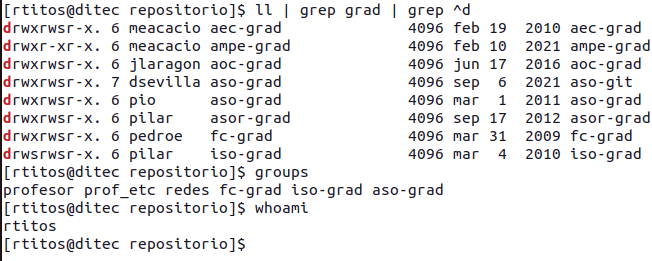

Con el comando `groups`: podemos ver a qué grupos pertenecemos.

In [ ]:
groups

### Superusuario

Una buena razón para aprender los fundamentos de la línea de comandos es que las instrucciones que solemos encontrar en la red suelen favorecer el uso de comandos del shell en lugar de una interfaz gráfica. Cuando esas instrucciones requieran cambios en tu máquina que vayan más allá de la modificación de unos pocos ficheros en tu
directorio personal, inevitablemente te encontrarás con comandos que deben ser ejecutados como administrador de la máquina (o superusuario en la jerga de Unix). Antes de que empieces a ejecutar comandos arbitrarios que encuentres en algún rincón oscuro de Internet, vale la pena entender las implicaciones de ejecutar como administrador, para que puedas valorar mejor si son seguras de ejecutar o no.


El superusuario es un usuario con superpoderes, pues **puede modificar o eliminar cualquier fichero en cualquier directorio del sistema, independientemente de quién sea su propietario**; `root` puede reescribir las reglas del cortafuegos o iniciar servicios de red que podrían abrir la máquina a un ataque; o apagar la máquina aunque haya otras personas utilizándola. En resumen, el usuario `root` puede hacer prácticamente cualquier cosa, saltándose fácilmente las protecciones que se suelen poner en marcha para evitar que los usuarios se pasen de la raya. Por supuesto, una persona conectada como root es tan capaz de cometer errores como cualquier otra. Los anales de la historia de la informática están llenos de relatos en los que un comando mal escrito borra todo el sistema de ficheros o mata un servidor vital. Además, existe la posibilidad de un ataque malicioso: si un usuario se conecta como root y abandona su escritorio, no es demasiado difícil que un colega descontento se meta en su máquina y cause estragos.

Para tratar de minimizar la cantidad de tiempo que se pasa conectado como root, muchas distribuciones de Linux comenzaron a fomentar el uso del comando `su` (*switch user*), que permite cambiar a otro usuario en la máquina sin tener que salir y entrar de nuevo. Cuando se utiliza sin parámetros, asume que quieres cambiar al usuario `root`, pero puedes pasarle un nombre de usuario para cambiar a una cuenta de usuario específica.

En muchas distribuciones de Linux, como Ubuntu, la cuenta de `root` está deshabilitada por completo para no permitir sesiones de terminal de larga duración con poderes peligrosos. En su lugar, se requiere que el usuario solicite específicamente los derechos de superusuario en cada comando mediante `sudo` (que viene de “cambiar de usuario y hacer este comando”). `sudo` se utiliza antepuesto a un comando que debe ejecutarse con privilegios de superusuario. Por ejemplo: 
```bash
$ sudo chown newowner FILE
```

Se utiliza un fichero de configuración para definir qué usuarios pueden utilizar `sudo`, y qué comandos pueden ejecutar. Cuando se ejecuta, al usuario se le pide su propia contraseña, que se almacena en la memoria durante un período de tiempo (por defecto 15 minutos), por lo que si necesita ejecutar varios comandos de nivel de superusuario no se le pide continuamente que la escriba. En un sistema Ubuntu, el primer usuario creado cuando se instala el sistema se
considera el superusuario.


### Permisos en ficheros

El significado de los permisos de lectura y escritura es obvio.
* **Lectura**. El permiso de lectura nos permite acceder al contenido del fichero con una orden o un editor de texto.
* **Escritura**. Si carecemos de permiso de escritura no se habilitará en el menú de éste la opción de salvar fichero (si lo abrimos con el editor de texto desde el explorador de archivos). Tampoco podremos escribir en el mismo usando el operador de redirección (`>` ó `>>`)
* **Ejecución**.  El permiso de ejecución se le añade al fichero sólo cuando éste es un programa ejecutable o cuando, después de editar un fichero con un editor de texto ASCII plano, queremos que éste se ejecute como un *script* (también llamado "guión shell").

In [ ]:
echo "Nobody can see this!" > file_noaccess

In [ ]:
ll file_noaccess

In [ ]:
# Quitamos todos los permisos a todo el mundo
chmod 000 file_noaccess

In [ ]:
ll file_noaccess

In [ ]:
# Comenta (#) el comando tras ejecutarlo
# cat file_noaccess

In [ ]:
echo "Un fichero cualquiera" > file_regular

In [ ]:
ll file_regular

In [ ]:
chmod 644 file_regular

In [ ]:
echo "con varias líneas" >> file_regular

In [ ]:
cat file_regular

In [ ]:
ll file_regular

In [ ]:
cat file_regular

In [ ]:
echo "Edit me if you can" > file_readonly


In [ ]:
chmod 444 file_readonly

In [ ]:
ll file_readonly

In [ ]:
# Comenta (#) el comando tras ejecutarlo
# echo "Can't write to this file!" >> file_readonly

In [ ]:
ls -l file*

In [ ]:
# Comenta (#) el comando tras ejecutarlo
# ./file_regular

In [ ]:
echo '#!/bin/bash' > file_roexecutable
echo 'echo "Hello world"' >> file_roexecutable

In [ ]:
cat file_roexecutable

In [ ]:
ll file_roexecutable

In [ ]:
chmod 554 file_roexecutable

In [ ]:
ll file_roexecutable

Recuerda: Para ejecutar un fichero debes indicar su ruta completa, ya sea de forma relativa al directorio de trabajo actual o bien la ruta absoluta. Si el fichero a ejecutar está situado en el directorio actual, entonces debes indicarlo explícitamente anteponiendo `./` al nombre del fichero. De lo contrario, el *shell* interpretará que el programa que quieres ejecutar está en el `PATH`, es decir, en alguno de los directorios en los que por defecto se ubican los programas instalados para todos los usuarios (p.ej., `/usr/bin`, etc.). En el próximo boletín de prácticas veremos esto (concepto de `PATH` con más detalle).

In [ ]:
# Si no indicamos la ruta, el shell no será capaz de encontrar el fichero a ejecutar (comenta el comando tras obtener el error)
# file_roexecutable

In [ ]:
./file_roexecutable

In [ ]:
ls -l /usr/bin/cat

In [ ]:
# Creamos una copia del programa "cat", llamada "mostrar_fichero", ubicada en el directorio actual:
cp /usr/bin/cat ./mostrar_fichero

In [ ]:
ls -l

In [ ]:
# Se trata de un fichero que contiene un programa en código máquina, y con permisos de ejecución...
./mostrar_fichero file_regular

Aunque se permite cualquier combinación de los tres permisos, habitualmente un fichero tiene permiso de sólo lectura, o de lectura y también de escritura, o de lectura y ejecución, o de lectura, escritura y ejecución. Es atípico que un fichero sólo tenga permiso de escritura, pues su carencia del permiso de lectura impide que el editor lo lea (*la escritura en estos ficheros podría hacerse en cualquier caso, por ejemplo, con una orden redireccionada al fichero, como veremos en un boletín de prácticas posterior*).

### Permisos en directorios

Aquí el significado de los permisos no es tan obvio. 

* **Lectura**. El permiso de lectura permite conocer las entradas del directorio, por ejemplo realizando un listado de su contenido.
* **Escritura**. El permiso de escritura permite modificar las entradas al directorio (por ejemplo crear, borrar o renombrar ficheros o directorios dentro de él). 
* **Ejecución**. Finalmente, el permiso de ejecución permite entrar dentro de un directorio (por ejemplo con el comando `cd directorio`) o utilizar este directorio en programas que necesiten acceder a sus contenidos como por ejemplo en búsquedas realizadas con el comando `find`.
  
> **IMPORTANTE:** Los permisos de lectura y escritura del directorio, respectivamente,  **no tienen relación con la lectura y modificación del contenido en sí de los ficheros** ubicados en dicho directorio, puesto que éstos son permisos propios de cada fichero individual. 


In [ ]:
# Creamos 5 directorios
mkdir -p dir1 dir2 dir3 dir4 dir5
# Creamos ficheros vacíos en 4 de ellos
touch dir1/onefile
touch dir2/anotherfile
touch dir3/yetanotherfile
touch dir4/unfichero

In [ ]:
ls -ld dir* # La opción -d de ls es para listar los directorios mismos, en vez de su contenido

In [ ]:
chmod 750 dir2

In [ ]:
# dir2 es ahora inaccesible al resto de usuarios, y miembros del grupo no pueden modificarlo
ls -ld dir2 

In [ ]:
chmod 500 dir3

In [ ]:
# dir3 es un directorio de solo lectura para el propietario, sin acceso para el resto
ls -ld dir3 

In [ ]:
# yetanotherfile es un fichero en blanco con permisos rw
cat dir3/yetanotherfile

In [ ]:
# Comenta (#) el comando tras ejecutarlo
rm dir3/yetanotherfile

Como vemos, el fichero no se puede eliminar porque el directorio `dir3` es de sólo lectura. *RECUERDA: un directorio es **una lista** de ficheros/directorios*. En este caso, sólo podemos leer la lista pero no quitar elementos de dicha lista.

Lo que sí podemos hacer es **modificar el contenido** de ficheros que estén en directorios de sólo lectura, siempre que dichos ficheros tengan los permisos de escritura, como en este caso.

In [ ]:
echo "Hola" > dir3/yetanotherfile

In [ ]:
# El *CONTENIDO* de yetanotherfile puede ser modificado!
cat dir3/yetanotherfile

In [ ]:
# dir4 es un directorio al que ni siquiera el propietario se puede cambiar con "cd"
chmod 400 dir4

In [ ]:
ls -ld dir4

In [ ]:
# No podemos cambiarnos a dir4 (comentar el comando tras obtener el error)
# cd dir4

In [ ]:
# Pero sí podemos mostrar el nombre de los ficheros que contiene
ls dir4

In [ ]:
# Sin embargo no podemos acceder al contenido de los ficheros sin permiso de ejecución en el directorio
# Comenta el comando tras obtener el error
# cat dir4/unfichero

Lo normal para un directorio será que tenga los permisos de lectura, escritura y ejecución (`rwx`) para el propietario del fichero, y los permisos de lectura y ejecución (`r-x`) para el resto (grupo propietario y resto de usuarios). En caso de que fuese necesario, podríamos evitar que el resto de usuarios que no sean del grupo al que pertenece el fichero tenga acceso al directorio, como vemos a continuación.

In [ ]:
# dir5 es un directorio sin ningún tipo de acceso
chmod 000 dir5

In [ ]:
ls -ld dir5

No es posible acceder a directorios sobre los que no tengamos permisos de ejecución:

In [ ]:
# Comenta el comando tras obtener el error
# cd dir5

Habitualmente se suelen habilitar los permisos de escritura y ejecución conjuntamente si queremos dar permisos para borrar entradas o crear nuevas. La habilitación de sólo el permiso de lectura de un directorio nos permite
conocer sus entradas (nombres de ficheros y directorios) pero nada más (ni permisos, ni fechas, ni tamaños,
etc.). Como vemos a continuación, tener exclusivamente permiso de lectura sobre un directorio no basta para poder acceder a los ficheros del directorio:

#### <span style="color: blue;">EJERCICIO</span>

In [ ]:
# Haz un listado largo del directorio actual
ls -l

- Modifica los permisos del fichero `file_regular` para que sólo el propietario pueda modificar su contenido, mientras que el resto pueda únicamente leerlo.

In [ ]:
chmod 644 file_regular                            #@solution@

In [ ]:
ls -l file_regular

- Modifica los permisos del fichero `file_readonly` para que sólo el propietario pueda ver su contenido, mientras que el resto no tenga ningún tipo de acceso al mismo.

In [ ]:
chmod 644 file_readonly                        #@solution@

In [ ]:
ls -l file_readonly

- Modifica los permisos del fichero `file_roexecutable` para que cualquier usuario de la máquina pueda verlo y ejecutarlo.

In [ ]:
chmod 555 file_roexecutable                            #@solution@

In [ ]:
ls -l file_roexecutable

- Modifica los permisos del directorio `dir3` para que el propietario pueda añadir nuevos ficheros al mismo y los miembros del grupo puedan acceder a dicho directorio y ver su contenido.

In [ ]:
chmod 750 dir3                           #@solution@

In [ ]:
ls -ld dir3

In [ ]:
cd
cd pruebas-bash
chmod -Rf 700 bash-gestion-permisos
rm -rf bash-gestion-permisos
rm -rf pruebas-bash